In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd

In [82]:
import os

def create_gitignore():
    current_dir = os.getcwd()
    gitignore_path = os.path.join(current_dir, '.gitignore')
    
    gitignore_content = '''# Ignore data folder
data/
# Ignore Python bytecode
**pycache**/
*.pyc
# Ignore model checkpoints
checkpoints/
*.h5
*.ckpt
# Ignore large intermediate files
logs/
*.npy
*.npz
*.csv
# Ignore system files
.DS_Store
# Ignore zip
*.zip
'''
    
    try:
        with open(gitignore_path, 'w') as file:
            file.write(gitignore_content)
        print(f"Successfully created .gitignore file at: {gitignore_path}")
        print(f"Current working directory: {current_dir}")
    except IOError as e:
        print(f"An error occurred while creating .gitignore: {e}")

# Run the function
create_gitignore()

Successfully created .gitignore file at: C:\Users\End User\FC-DS1.3\project\.gitignore
Current working directory: C:\Users\End User\FC-DS1.3\project


In [1]:
import zipfile
import os
from tqdm import tqdm

zip_file_path = "archive.zip"

output_dir = "data"

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    file_list = zip_ref.namelist()

    with tqdm(total=len(file_list), desc="Extracting Files", unit="file") as pbar:
        for file in file_list:
            zip_ref.extract(file, output_dir) 
            pbar.update(1) 

Extracting Files: 100%|██████████| 87028/87028 [02:47<00:00, 519.58file/s]


In [17]:
import shutil

test_dir = "data/asl_alphabet_test/asl_alphabet_test"
output_dir = "data/asl_alphabet_test/asl_alphabet_test_restructured"

os.makedirs(output_dir, exist_ok=True)

for file in os.listdir(test_dir):
    if file.endswith(".jpg"):
        class_label = file[0] 
        class_dir = os.path.join(output_dir, class_label)
        os.makedirs(class_dir, exist_ok=True)
        shutil.move(os.path.join(test_dir, file), os.path.join(class_dir, file))

# Image preprocessing

In [5]:
image_size = (128, 128) 
batch_size = 32         

In [33]:
train_path = "data/asl_alphabet_train/asl_alphabet_train"

train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_path,
    labels="inferred",  
    label_mode="categorical", 
    image_size=image_size,    
    batch_size=batch_size,    
    shuffle=True              
)

Found 87000 files belonging to 29 classes.


In [41]:
test_path = "data/asl_alphabet_test/asl_alphabet_test_restructured"

test_dataset = tf.keras.utils.image_dataset_from_directory(
    test_path,
    labels="inferred",  
    label_mode="categorical", 
    image_size=image_size,    
    batch_size=batch_size,    
    shuffle=True              
)

Found 30 files belonging to 29 classes.


In [43]:
train_dataset = train_dataset.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
test_dataset = test_dataset.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
# visualize the data

Image batch shape: (32, 128, 128, 3)
Label batch shape: (32, 29)
Labels (One-Hot Encoded): [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.

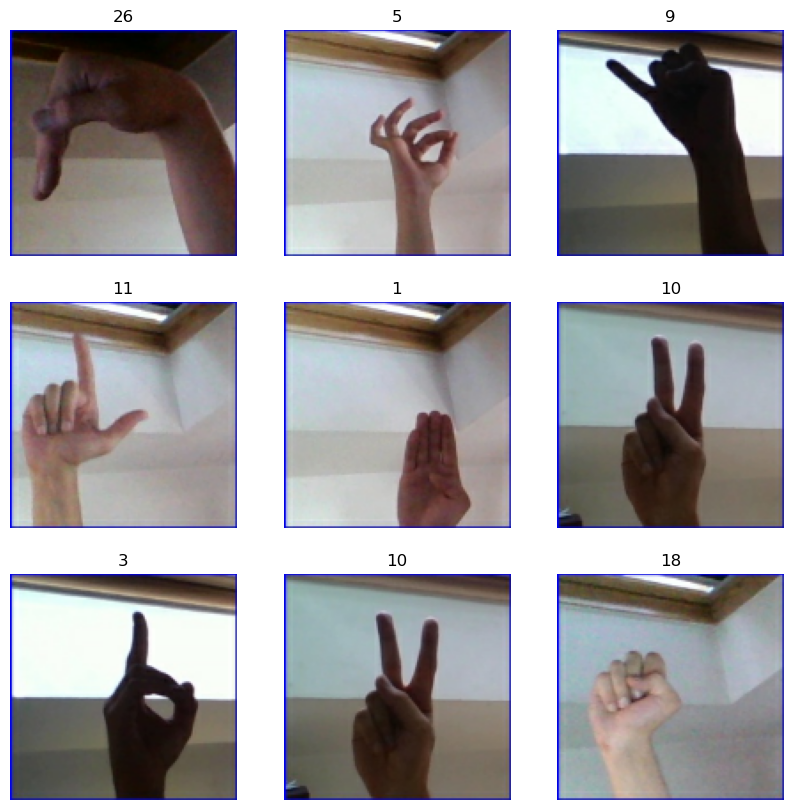

In [45]:
import matplotlib.pyplot as plt

for images, labels in train_dataset.take(1): 
    print("Image batch shape:", images.shape)
    print("Label batch shape:", labels.shape)
    print("Labels (One-Hot Encoded):", labels.numpy())

    plt.figure(figsize=(10, 10))
    for i in range(9): 
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(labels[i].numpy().argmax()) 
        plt.axis("off")
    plt.show()


# Creating model

In [64]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5), 
    Dense(29, activation='softmax') 
])

In [66]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [68]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 29)             │         3,741 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,309,789 (12.63 MB)

 Trainable params: 3,309,085 (12.62 MB)

 Non-trainable params: 704 (2.75 KB)

In [ ]:
history = model.fit(
    train_dataset,
    validation_data=test_dataset,
    epochs=10,
    batch_size=300
)